## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [72]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
df = pd.read_csv('datasets/office_episodes.csv')
df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [75]:
df.describe()

,episode_number,season,ratings,votes,viewership_mil,duration,scaled_ratings
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191,0.511636
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254,0.184353
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000,0.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000,0.375000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000,0.500000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000,0.625000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000,1.000000


# Success of  each episode (By viewership)

In [76]:
ep_view = df[["episode_number", "viewership_mil", "scaled_ratings", "has_guests"]]

ep_view.head()

,episode_number,viewership_mil,scaled_ratings,has_guests
0,0,11.2,0.28125,False
1,1,6.0,0.53125,False
2,2,5.8,0.37500,False
3,3,5.4,0.46875,False
4,4,5.0,0.56250,False


In [77]:
# Setting figure size
plt.rcParams['figure.figsize'] = [11, 7]


# Colour conditioning using np.where()
# https://stackoverflow.com/questions/40803570/python-matplotlib-scatter-plot-specify-color-points-depending-on-conditions

colors = np.where(ep_view["scaled_ratings"] < 0.25,'red',  
                  np.where(ep_view["scaled_ratings"] < 0.5,'orange', 
                  np.where(ep_view["scaled_ratings"] < 0.75,'lightgreen','darkgreen')))

In [78]:
# Size conditioning using np.where()
sizes = np.where(ep_view["has_guests"] == True, 250, 25)

<Figure size 792x504 with 0 Axes>

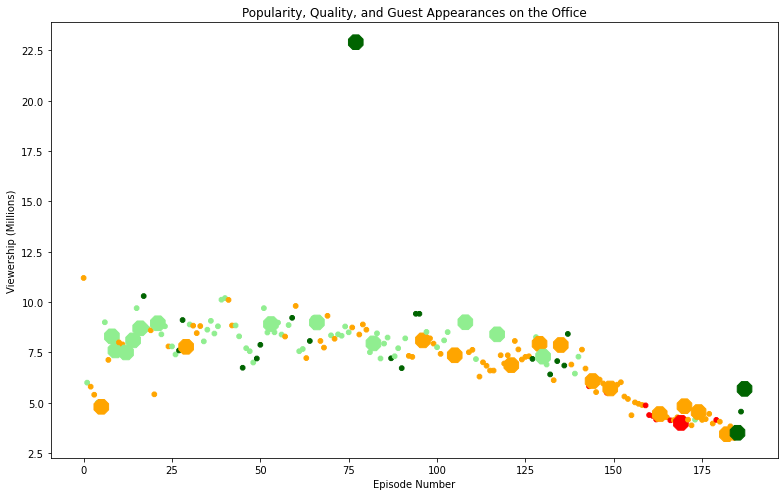

,episode_number,viewership_mil,scaled_ratings,has_guests
77,77,22.91,0.96875,True
0,0,11.20,0.28125,False
17,17,10.30,0.78125,False
40,40,10.20,0.68750,False
39,39,10.12,0.62500,False


In [79]:
# Plotting the graph

fig = plt.figure()
ep_view.plot(kind="scatter", x="episode_number", y="viewership_mil", marker="8", c=colors, s=sizes)

# Figure Descriptions (Title, xlabel, ylabel)

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")


plt.show()

ep_view.sort_values(by=["viewership_mil", "scaled_ratings"], ascending=[False, False]).head()

# Guest Stars that appeared in most popular episode (In context of views)

In [80]:
# Most viewed episode
ep = df["viewership_mil"].idxmax()

# Guest stars that appeared on Ep 77
top_star = df.iloc[ep, :]["guest_stars"].split(",")[0]